# Notebook Proyek Pertama Machine Learning Terapan

---

## Data Diri

Nama: Bima Rakajati

E-mail: bimandugal@gmail.com

---

## Deskripsi Proyek

Proyek ini melibatkan analisis dan prediksi kinerja siswa berdasarkan berbagai faktor seperti jam belajar, nilai sebelumnya, jam tidur, dan aktivitas ekstrakurikuler. Alur kerja mencakup pembersihan data, analisis data eksploratif (EDA), persiapan data, pengembangan model, dan evaluasi model. Tiga model pembelajaran mesin (K-Nearest Neighbors, Random Forest, dan Support Vector Machine) dikembangkan dan dievaluasi, dengan model Support Vector Machine menunjukkan kinerja terbaik dalam memprediksi indeks prestasi siswa.

---

# 1. Importing Library

Pada tahap ini, kita mengimpor seluruh library yang diperlukan seperti `sklearn`, `kagglehub`, `matplotlib`, `pandas`, `seaborn`, dan lain-lain.

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import kagglehub
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import textwrap
import warnings
warnings.filterwarnings("ignore")

# 2. Data Loading

Pertama, kita akan mengunduh dataset yang akan digunakan. Dataset yang digunakan adalah dataset `Student Performance` yang tersedia di Kaggle.

In [106]:
# Download latest version
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: /home/bima/.cache/kagglehub/datasets/nikhil7280/student-performance-multiple-linear-regression/versions/1


Selanjutnya, kita melihat isi dari dataset secara sekilas dengan `.head()` dan ukuran dari dataset dengan `.shape`

In [107]:
# Membaca dataset
df = pd.read_csv(path + "/Student_Performance.csv")

# Menampilkan ukuran data
print(df.shape)

# Menampilkan 5 data pertama
df.head()

(10000, 6)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


Dari data di atas, terlihat bahwa terdapat 6 variabel dengan jumlah data sebanyak `10000`.

# 3. Data Understanding

## A. Deskripsi Variabel

Berikut merupakan arti dari masing-masing variabel beserta nilai-nilainya.

No | Variabel | Keterangan | Nilai
----------|----------|----------|----------
1 | Hours Studied | Jumlah jam belajar | 0-9
2 | Previous Scores | Nilai sebelumnya | 40-99
3 | Extracurricular Activities | Aktivitas ekstrakurikuler | Yes or No
4 | Sleep Hours | Jumlah jam tidur | 4-9
5 | Sample Question Papers Practiced | Jumlah soal latihan yang dikerjakan | 0-9
6 | Performance Index | Indeks prestasi | 0-100

## B. Jumlah Masing-masing Variabel Beserta Tipenya

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Dari hasil di atas, terlihat bahwa kolom `Extracurricular Activities` bertipe object, kolom `Performance Index` bertipe float64, dan kolom `Hours Studied`, `Previous Scores`, `Sleep Hours`, `Sample Question Papers Practiced` bertipe int64.

## C. Deskripsi Statistik Data

Selanjutnya, kita akan melihat deskripsi statistik dari data yang dimiliki.

In [109]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


Dari hasil tersebut, dapat disimpulkan bahwa rata-rata dari variabel `Hours Studied` adalah 4.9, `Previous Scores` adalah 69.5, `Sleep Hours` adalah 6.5, `Sample Question Papers Practiced` adalah 4.5, dan `Performance Index` adalah 55.2.

# 4. Data Cleaning

## A. Memeriksa Missing Value

In [110]:
pd.DataFrame({'Nilai yang Kosong':df.isnull().sum()})

,Nilai yang Kosong
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


Dari hasil di atas, tidak ada variabel yang memiliki nilai `null` atau kosong.

## B. Memeriksa Data Duplikat

Selanjutnya, kita akan memeriksa apakah terdapat data duplikat pada dataset ini.

In [111]:
df.duplicated().sum()

127

Berdasarkan hasil di atas, terdapat 127 data duplikat dalam dataset ini. Kita akan memeriksa data duplikat ini.

In [112]:
# Menampilkan data duplikat
df[df.duplicated]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71.0
9940,8,95,No,5,2,90.0
9954,6,97,No,8,7,92.0
9966,1,41,No,7,3,12.0


Dari tampilan di atas, terlihat bahwa ada data duplikat, sehingga kita akan menghapus data-data tersebut.

In [113]:
df.drop_duplicates(inplace = True)

Selanjutnya, akan dilihat info dan deskripsi statistik dari data yang telah dibersihkan.

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


In [115]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


## C. Memeriksa Outlier

Akan digunakan boxplot untuk melihat persebaran data pada masing-masing kolom.

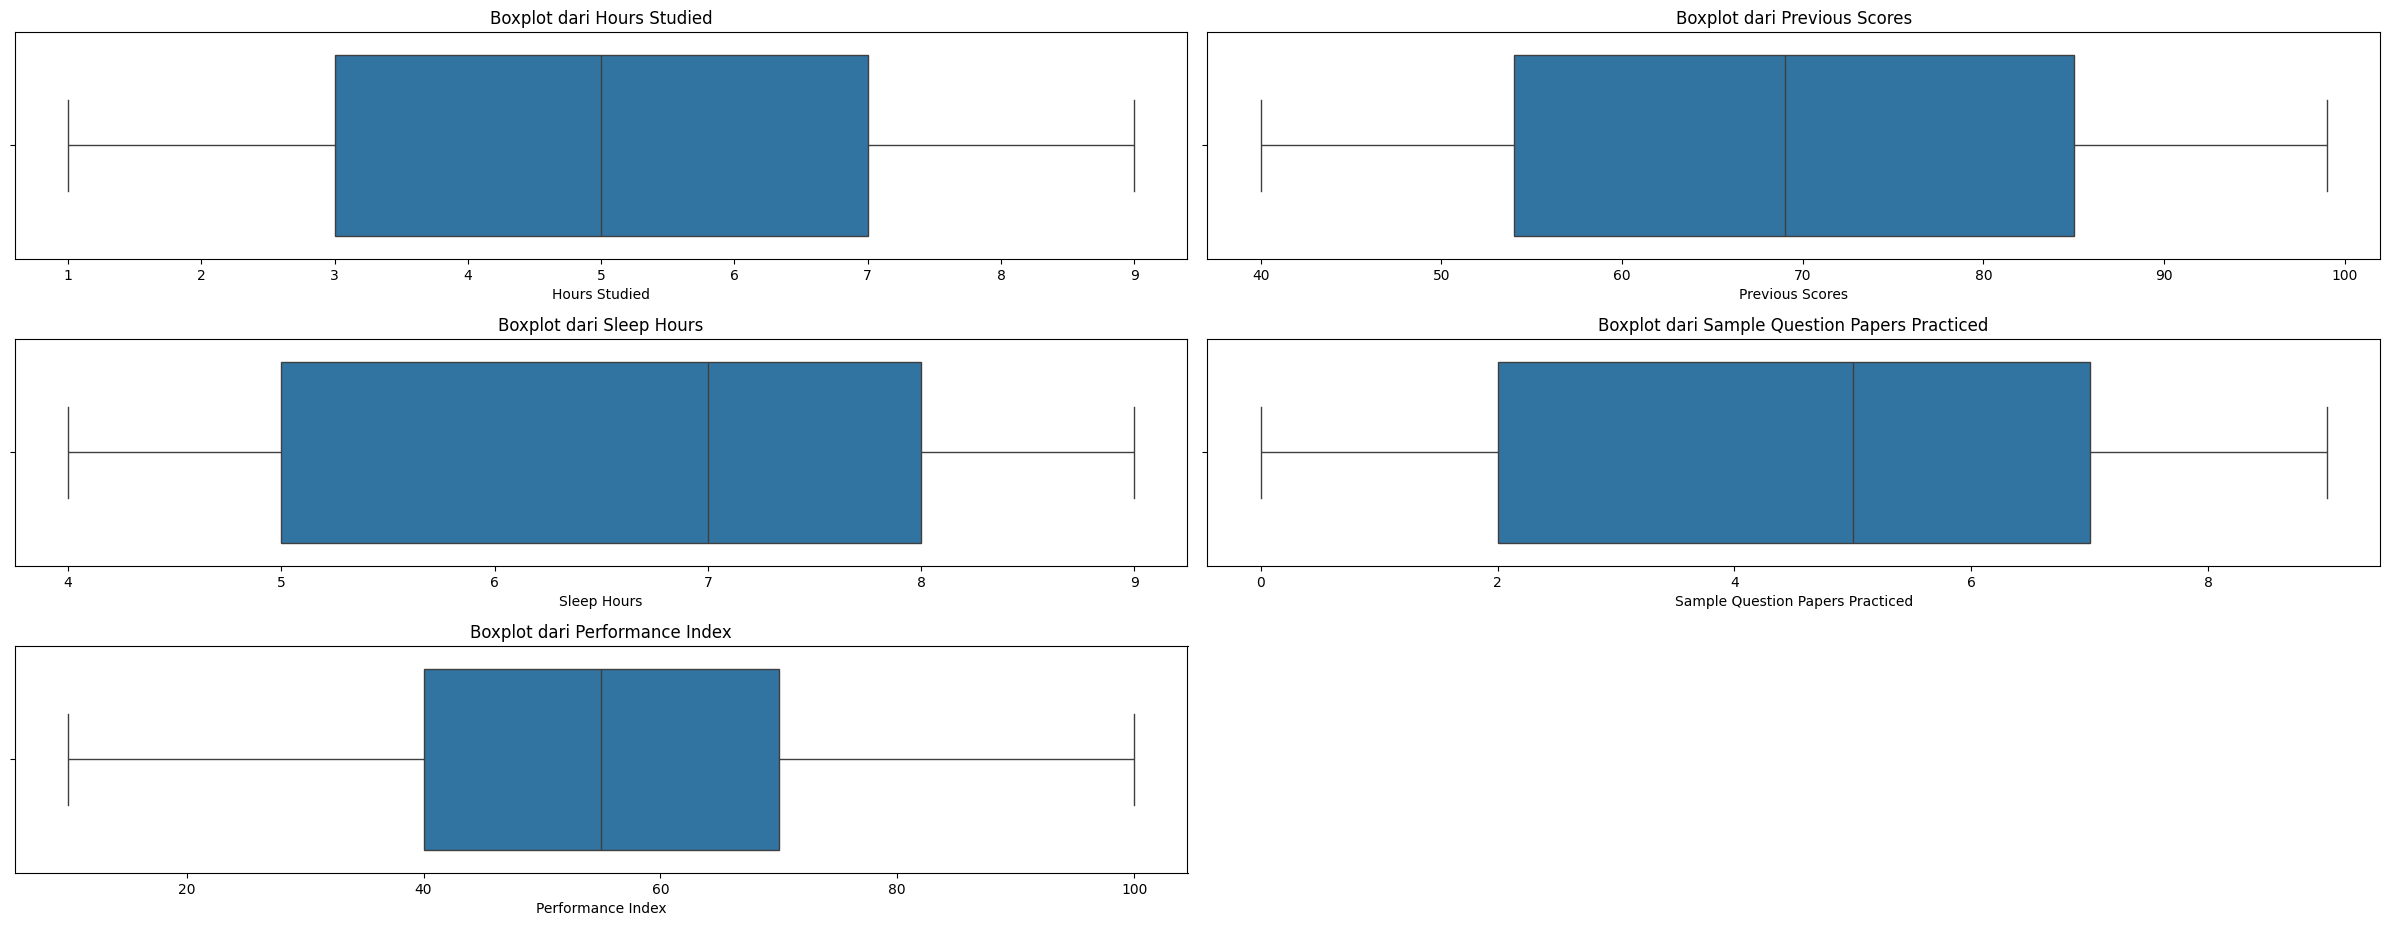

In [116]:
# Menuliskan seluruh nama kolom numerikal
kolom_data = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced", "Performance Index"]

# Membentuk plot berukuran 24 x 12
plt.figure(figsize = (24, 12))

# Membentuk plot berisi 8 subplot, dengan setiap subplot merupakan boxplot
for i in range(len(kolom_data)):

    # Membentuk plot dengan subplot berukuran 4 x 2
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x = df[kolom_data[i]])
    plt.title('Boxplot dari {}'.format(kolom_data[i]))
    plt.tight_layout()

Dari hasil di atas, terlihat bahwa tidak ada data outlier pada dataset ini. Sehingga, kita dapat melanjutkan ke tahap berikutnya.

# 5. Exploratory Data Analysis

## A. Univariate Analysis

Pertama, kita akan membagi variabel-variabel yang ada menjadi 2 kategori, yaitu kategori numerikal dan kategori kategorical.

In [117]:
# Membentuk list berisi kolom-kolom numerikal (data yang bertipe float64 atau int64)
kolom_numerikal = [nama_kolom for nama_kolom in df if df[nama_kolom].dtype in ["float64", "int64"]]

# Membentuk list berisi kolom-kolom kategorikal (data yang bertipe object)
kolom_kategorikal = [nama_kolom for nama_kolom in df if df[nama_kolom].dtype == "object"]

# Menampilkan list kolom numerikal dan kolom kategorikal
print("Kolom-kolom numerikal: ", kolom_numerikal)
print("Kolom-kolom kategorikal: ", kolom_kategorikal)

Kolom-kolom numerikal:  ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
Kolom-kolom kategorikal:  ['Extracurricular Activities']


Selanjutnya, kita akan melihat nilai-nilai pada kolom kategorikal.

In [118]:
# Menghitung jumlah nilai yang unik/berbeda dari masing-masing variabel pada kolom kategorikal
jumlah_unik = df[kolom_kategorikal].nunique()

# Menampilkan nilai yang unik/berbeda dari masing-masing variabel pada kolom kategorikal
nilai_unik = df[kolom_kategorikal].apply(lambda x: [x.unique()])

# Menampilkan hasil dalam bentuk DataFrame
pd.DataFrame({"Total Nilai Berbeda": [jumlah_unik['Extracurricular Activities']], "Nilai-Nilai": [nilai_unik['Extracurricular Activities'][0]]}, index=["Extracurricular Activities"])

,Total Nilai Berbeda,Nilai-Nilai
Extracurricular Activities,2,"[Yes, No]"


Selanjutnya, kita akan melihat jumlah dari masing-masing nilai pada hasil di atas.

Extracurricular Activities
No     4986
Yes    4887
Name: count, dtype: int64


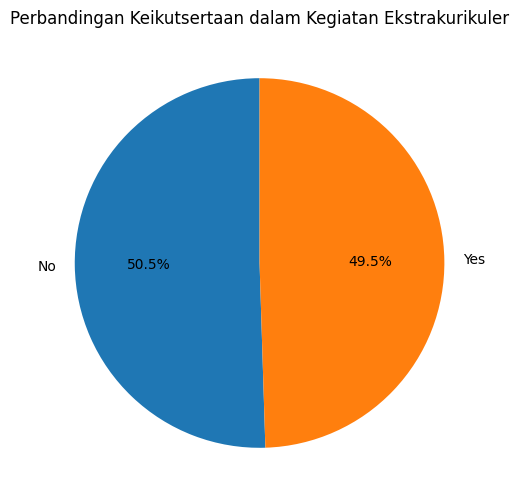

In [119]:
# Menampilkan nilai yang unik/berbeda dari masing-masing variabel pada kolom kategorikal
activity_counts = df['Extracurricular Activities'].value_counts()
print(activity_counts)

# Membentuk plot berukuran 10 x 6
plt.figure(figsize=(10, 6))
activity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Keikutsertaan dalam Kegiatan Ekstrakurikuler')
plt.ylabel('')
plt.show()

Dari hasil di atas, terlihat bahwa jumlah siswa yang melakukan aktivitas ekstrakurikuler ($49.5\%$) lebih sedikit dibandingkan dengan yang tidak melakukan aktivitas ekstrakurikuler ($50.5\%$).

Selanjutnya, kita akan membentuk histogram dari variabel-variabel numerikal untuk melihat persebaran data.

In [120]:
# Print df numerical columns
print(kolom_numerikal)

['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']


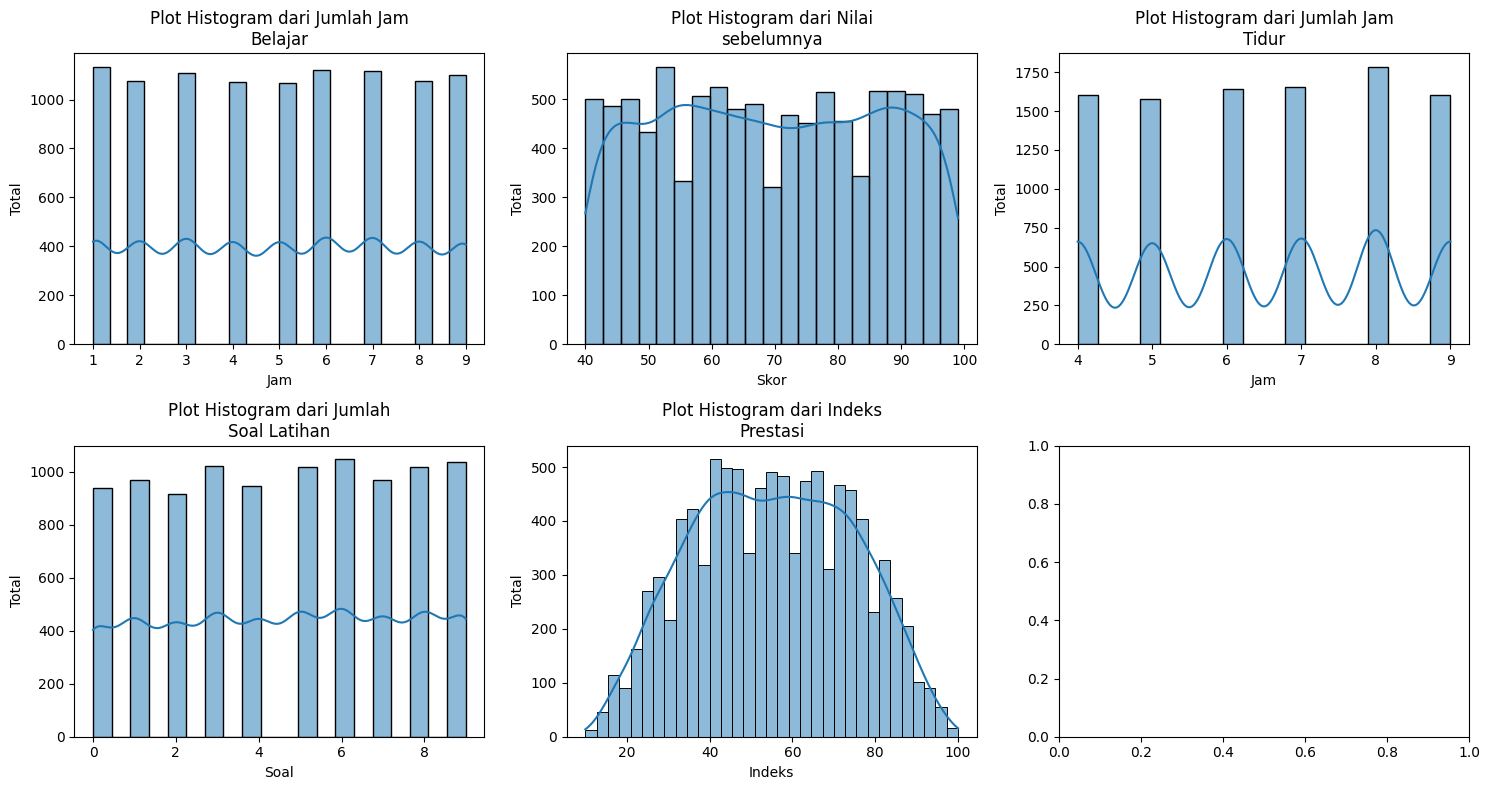

In [121]:
# Membentuk plot dengan subplot sejumlah 8 berukuran 2 x 3
fig, axes = plt.subplots(2, 3, figsize = (15, 8))

# Mengubah array multi dimensi menjadi array 1 dimensi
axes = axes.flatten()

# Menambahkan satuan dari masing-masing kolom
labels = ["Jam", "Skor", "Jam", "Soal", "Indeks"]

# Mendeskripsikan kolom-kolom numerikal yang akan digunakan
deskripsi_kolom_numerikal = ["Jumlah Jam Belajar", "Nilai sebelumnya", "Jumlah Jam Tidur", "Jumlah Soal Latihan", "Indeks Prestasi"]

# Membentuk plot jumlah dalam bentuk histogram plot untuk masing-masing kolom
for i, kolom in enumerate(df[kolom_numerikal].columns):
    sns.histplot(data = df, x = kolom, kde = True, ax = axes[i])

    # Menambahkan judul untuk masing-masing plot
    judul = "\n".join(textwrap.wrap(f"Plot Histogram dari {deskripsi_kolom_numerikal[i]}", width = 30))
    axes[i].set_title(judul)
    axes[i].title.set_size(12)

    # Mengatur label x
    axes[i].set_xlabel(labels[i])
    axes[i].set_ylabel("Total")

# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()

# Menampilkan plot
plt.show()

Gambar di atas dapat diinterpretasikan sebagai berikut.
1. Plot Histogram dari `Jumlah Jam Belajar`, `Nilai sebelumnya`, `Jumlah Jam Tidur`, dan `Jumlah Soal Latihan Yang Dikerjakan` tidak berdistribusi normal.
2. Plot Histogram dari `Indeks Prestasi` cukup berdistribusi normal.

## B. Multivariate Analysis

### 1. Membandingkan Tingkat Hours Studied Pada Setiap Performance Index

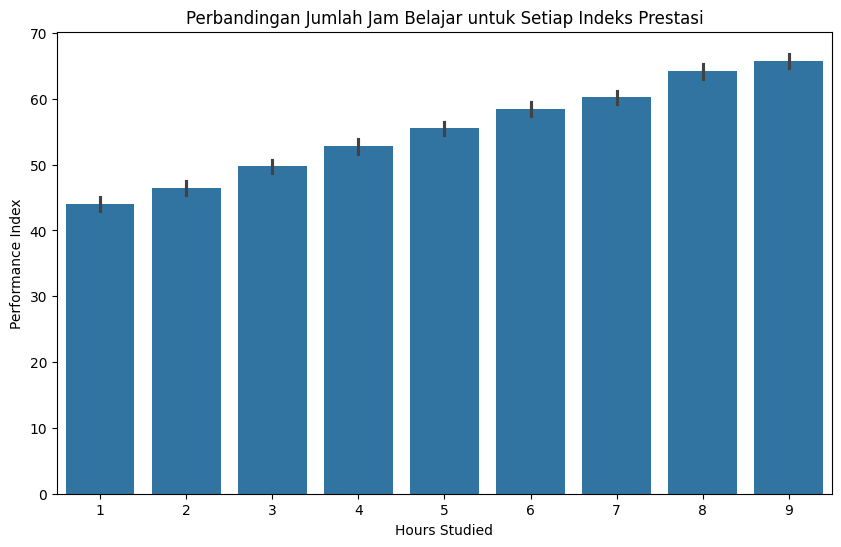

In [122]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Hours Studied', y='Performance Index')
plt.title('Perbandingan Jumlah Jam Belajar untuk Setiap Indeks Prestasi')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.show()

Dari hasil di atas, terlihat bahwa semakin banyak jam belajar, maka semakin tinggi pula indeks prestasi yang didapat.

### 2. Membandingkan Tingkat Previous Scores Pada Setiap Performance Index

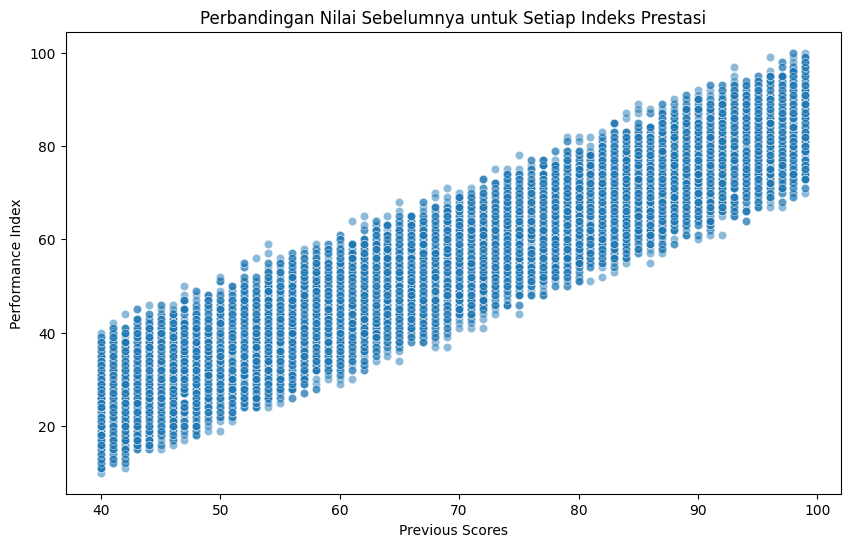

In [123]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Previous Scores', y='Performance Index', alpha=0.5)
plt.title('Perbandingan Nilai Sebelumnya untuk Setiap Indeks Prestasi')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.show()

Dari hasil di atas, terlihat bahwa semakin tinggi nilai sebelumnya, maka semakin tinggi pula indeks prestasi yang didapat.

### 3. Membandingkan Tingkat Sleep Hours Pada Setiap Performance Index

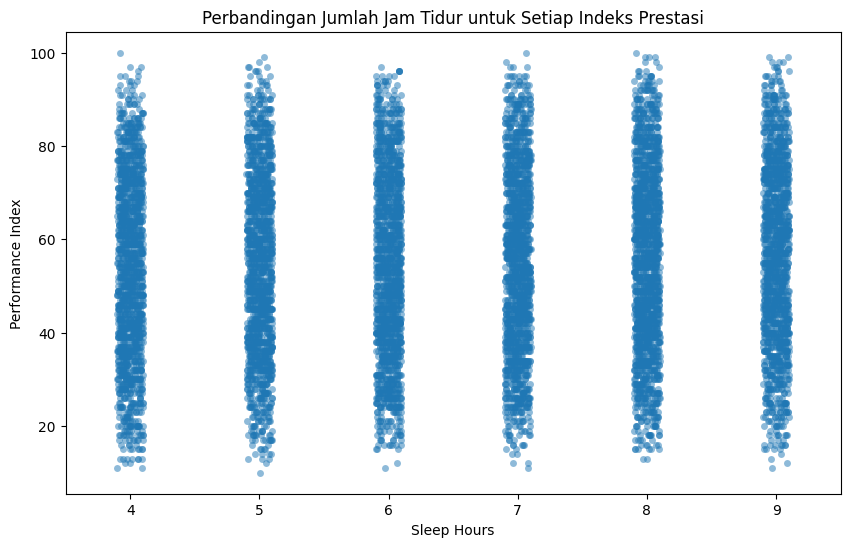

In [124]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='Sleep Hours', y='Performance Index', alpha=0.5)
plt.title('Perbandingan Jumlah Jam Tidur untuk Setiap Indeks Prestasi')
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.show()

Data di atas menunjukkan bahwa banyaknya jam tidur tidak mempengaruhi indeks prestasi yang didapat karena indeks prestasi yang didapat tidak berbeda jauh antara yang tidur 4-5 jam, 6-7 jam, dan 8-9 jam.

### 4. Membandingkan Tingkat Sample Question Papers Practiced Pada Setiap Performance Index

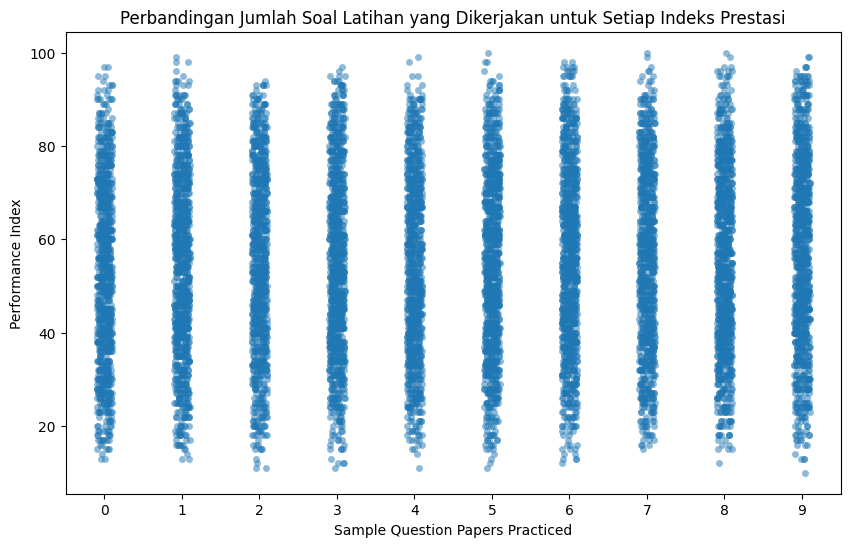

In [125]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='Sample Question Papers Practiced', y='Performance Index', alpha=0.5)
plt.title('Perbandingan Jumlah Soal Latihan yang Dikerjakan untuk Setiap Indeks Prestasi')
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.show()

Sama seperti variabel `Jumlah Jam Tidur`, variabel `Jumlah Soal Latihan Yang Dikerjakan` juga tidak mempengaruhi indeks prestasi yang didapat karena indeks prestasi yang didapat tidak berbeda jauh antara yang mengerjakan 0-3 soal, 4-6 soal, dan 7-9 soal.

### 5. Membandingkan Tingkat Hours Studied Dengan Extracurricular Activities

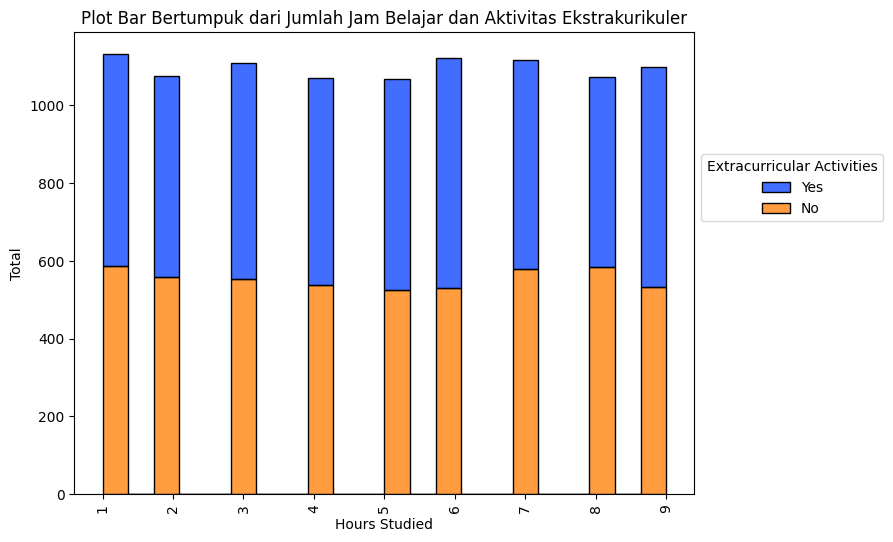

In [126]:
# Membentuk bar plot bertumpuk antara tingkat berat badan dengan frekuensi konsumsi alkohol
plt.figure(figsize = (8, 6))
plot_eight = sns.histplot(
    data = df, x = "Hours Studied", hue = "Extracurricular Activities", legend = True,
    multiple = "stack", palette = sns.color_palette("bright")
)

# Menambahkan judul pada plot
plt.title("Plot Bar Bertumpuk dari Jumlah Jam Belajar dan Aktivitas Ekstrakurikuler")

# Mengubah letak legend
sns.move_legend(plot_eight, "upper left", bbox_to_anchor = (1, 0.75))

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Hours Studied")
plt.xticks(rotation = 90)
plt.ylabel("Total")

# Menampilkan plot
plt.show()

Data di atas menunjukkan bahwa siswa yang melakukan aktivitas ekstrakurikuler memiliki jumlah jam belajar yang lebih tinggi dibandingkan dengan yang tidak melakukan aktivitas ekstrakurikuler.

### 6. Membandingkan Tingkat Previous Scores Dengan Extracurricular Activities

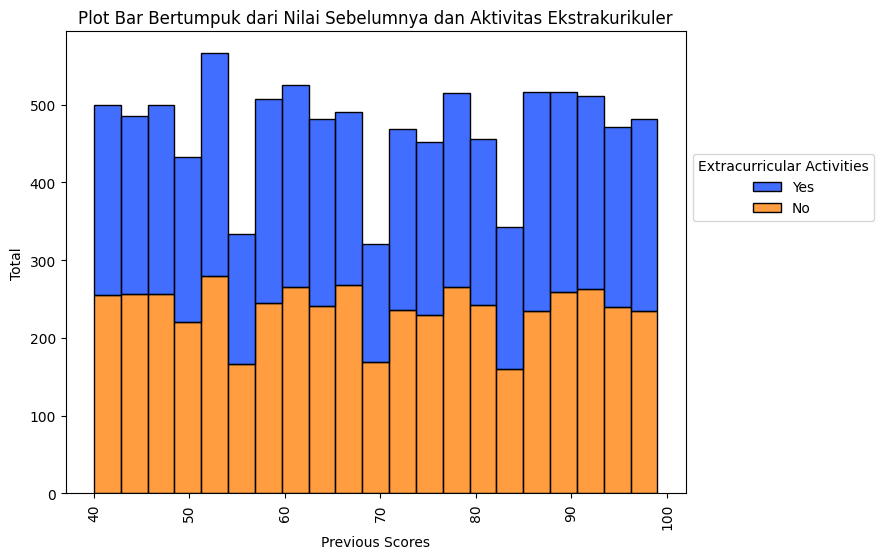

In [127]:
# Membentuk bar plot bertumpuk antara tingkat berat badan dengan frekuensi konsumsi alkohol
plt.figure(figsize = (8, 6))
plot_eight = sns.histplot(
    data = df, x = "Previous Scores", hue = "Extracurricular Activities", legend = True,
    multiple = "stack", palette = sns.color_palette("bright")
)

# Menambahkan judul pada plot
plt.title("Plot Bar Bertumpuk dari Nilai Sebelumnya dan Aktivitas Ekstrakurikuler")

# Mengubah letak legend
sns.move_legend(plot_eight, "upper left", bbox_to_anchor = (1, 0.75))

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Previous Scores")
plt.xticks(rotation = 90)
plt.ylabel("Total")

# Menampilkan plot
plt.show()

Data di atas menunjukkan bahwa siswa yang melakukan aktivitas ekstrakurikuler memiliki nilai sebelumnya yang lebih tinggi dibandingkan dengan yang tidak melakukan aktivitas ekstrakurikuler.

### 7. Membandingkan Tingkat Sleep Hours Dengan Extracurricular Activities

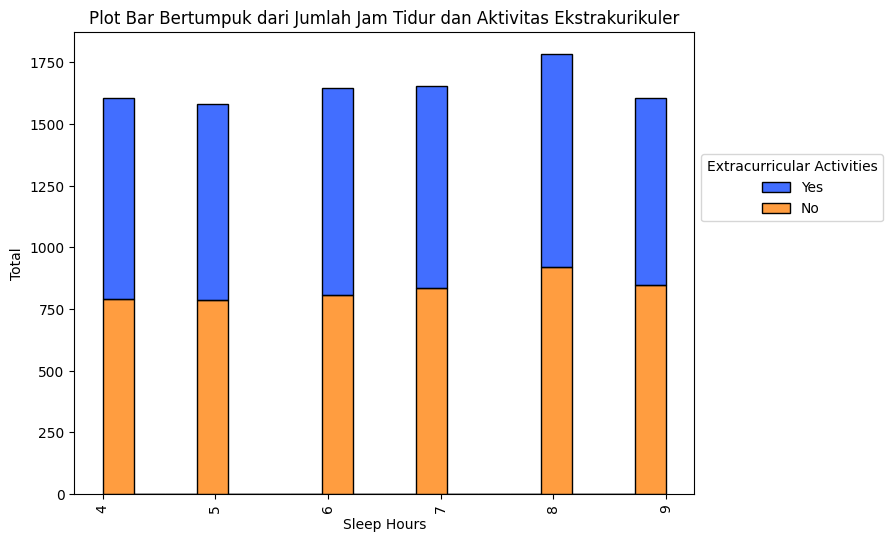

In [128]:
# Membentuk bar plot bertumpuk antara tingkat berat badan dengan frekuensi konsumsi alkohol
plt.figure(figsize = (8, 6))
plot_eight = sns.histplot(
    data = df, x = "Sleep Hours", hue = "Extracurricular Activities", legend = True,
    multiple = "stack", palette = sns.color_palette("bright")
)

# Menambahkan judul pada plot
plt.title("Plot Bar Bertumpuk dari Jumlah Jam Tidur dan Aktivitas Ekstrakurikuler")

# Mengubah letak legend
sns.move_legend(plot_eight, "upper left", bbox_to_anchor = (1, 0.75))

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Sleep Hours")
plt.xticks(rotation = 90)
plt.ylabel("Total")

# Menampilkan plot
plt.show()

Data di atas menunjukkan bahwa siswa yang melakukan aktivitas ekstrakurikuler memiliki jumlah jam tidur yang lebih tinggi dibandingkan dengan yang tidak melakukan aktivitas ekstrakurikuler.

### 8. Membandingkan Tingkat Sample Question Papers Practiced Dengan Extracurricular Activities

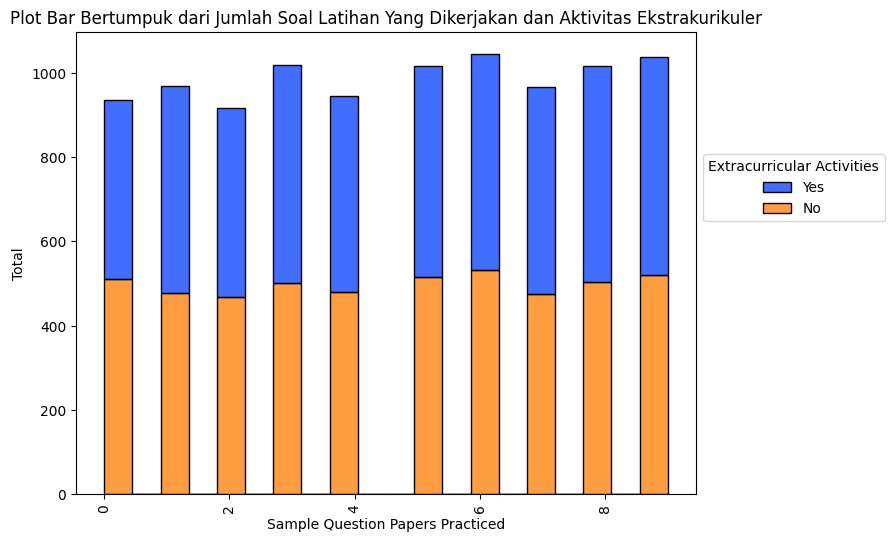

In [129]:
# Membentuk bar plot bertumpuk antara tingkat berat badan dengan frekuensi konsumsi alkohol
plt.figure(figsize = (8, 6))
plot_eight = sns.histplot(
    data = df, x = "Sample Question Papers Practiced", hue = "Extracurricular Activities", legend = True,
    multiple = "stack", palette = sns.color_palette("bright")
)

# Menambahkan judul pada plot
plt.title("Plot Bar Bertumpuk dari Jumlah Soal Latihan Yang Dikerjakan dan Aktivitas Ekstrakurikuler")

# Mengubah letak legend
sns.move_legend(plot_eight, "upper left", bbox_to_anchor = (1, 0.75))

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Sample Question Papers Practiced")
plt.xticks(rotation = 90)
plt.ylabel("Total")

# Menampilkan plot
plt.show()

Data di atas menunjukkan bahwa siswa yang melakukan aktivitas ekstrakurikuler menghabiskan lebih banyak waktu untuk mengerjakan soal latihan dibandingkan dengan yang tidak melakukan aktivitas ekstrakurikuler.

### 9. Membandingkan Tingkat Performance Index Dengan Extracurricular Activities

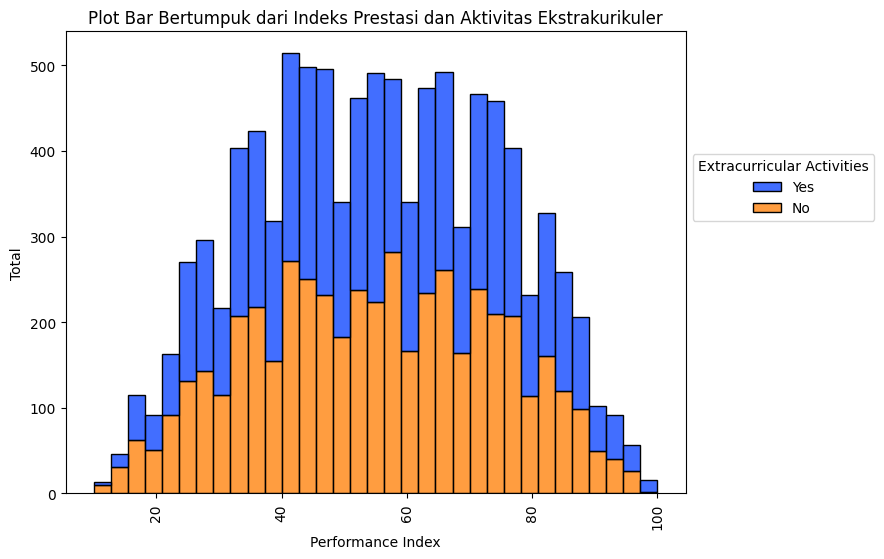

In [130]:
# Membentuk bar plot bertumpuk antara tingkat berat badan dengan frekuensi konsumsi alkohol
plt.figure(figsize = (8, 6))
plot_eight = sns.histplot(
    data = df, x = "Performance Index", hue = "Extracurricular Activities", legend = True,
    multiple = "stack", palette = sns.color_palette("bright")
)

# Menambahkan judul pada plot
plt.title("Plot Bar Bertumpuk dari Indeks Prestasi dan Aktivitas Ekstrakurikuler")

# Mengubah letak legend
sns.move_legend(plot_eight, "upper left", bbox_to_anchor = (1, 0.75))

# Menambahkan label sumbu x dan y pada plot
plt.xlabel("Performance Index")
plt.xticks(rotation = 90)
plt.ylabel("Total")

# Menampilkan plot
plt.show()

Data di atas menunjukkan bahwa siswa yang melakukan aktivitas ekstrakurikuler memiliki indeks prestasi yang lebih tinggi dibandingkan dengan yang tidak melakukan aktivitas ekstrakurikuler.

### 10. Melihat Korelasi Variabel dengan Menggunakan Heatmap

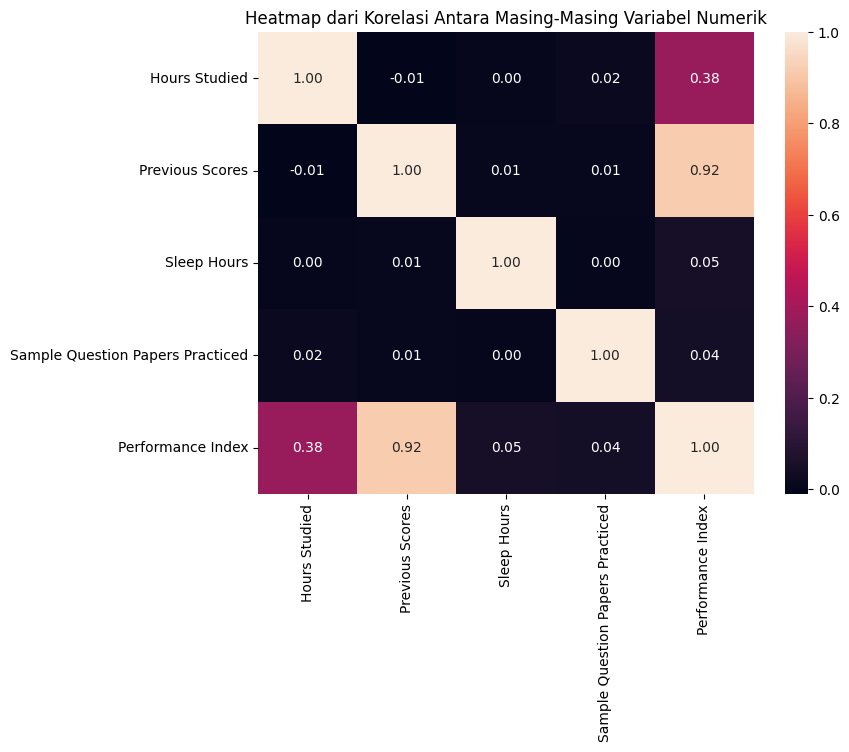

In [131]:
# Mencari korelasi antara masing-masing variabel numerik dengan korelasi pearson
corr = df.corr(method = "pearson", numeric_only = True)

# Membentuk heatmap antara masing-masing variabel numerik dan ditampilkan dalam bentuk desimal 2 angka di belakang koma
plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, fmt = ".2f", annot_kws = {"size": 10})

# Menambahkan judul pada plot
plt.title("Heatmap dari Korelasi Antara Masing-Masing Variabel Numerik")

# Menampilkan plot
plt.show()

Dari heatmap di atas, dapat dilihat bahwa `Indeks Prestasi` memiliki:
1. Korelasi positif yang kuat dengan `Nilai Sebelumnya`.
2. Korelasi positif yang lemah terhadap `Jumlah Jam Belajar`.
3. Korelasi positif yang sangat lemah terhadap `Jumlah Jam Tidur` dan `Jumlah Soal Latihan Yang Dikerjakan`.

# 6. Data Preparation

## A. Encoding Kategorikal

Akan dilakukan encoding terhadap seluruh data kategorikal agar seluruh data merupakan data numerik.

Pertama, kita akan melihat data sebelum dilakukan encoding.

In [132]:
df['Extracurricular Activities'].head()

0    Yes
1     No
2    Yes
3    Yes
4     No
Name: Extracurricular Activities, dtype: object

Pada data di atas, terlihat bahwa kolom `Extracurricular Activities` memiliki nilai `Yes` dan `No`. Selanjutnya, kita akan melakukan encoding terhadap kolom tersebut menjadi data numerik.

In [133]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df['Extracurricular Activities'].head()

0    1
1    0
2    1
3    1
4    0
Name: Extracurricular Activities, dtype: int64

Sekarang, data sudah diubah menjadi data numerik dengan nilai `1` untuk `Yes` dan `0` untuk `No`.

## B. Data Training dan Testing

Selanjutnya, karena target kita adalah variabel `Performance Index` maka variabel tersebut akan dijadikan sebagai target (`y`) dan variabel lainnya akan dijadikan sebagai fitur (`X`).

In [134]:
# Membentuk variabel X sebagai pengaruh dari target
X = df.drop(columns = "Performance Index")
print(X.shape)

# Membentuk variabel y sebagai target
y = df["Performance Index"]
print(y.shape)

(9873, 5)
(9873,)


Lalu, kita membagi data menjadi 2, yaitu:
* Data training sebesar $80$% untuk melatih model
* Data testing sebesar $20$% untuk menguji model

In [135]:
# Membentuk data training dan data testing dengan komposisi 80% : 20 % dan dirandom setiap dijalankan ulang
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Menampilkan ukuran data training dan testing dari X dan y
print("Ukuran X_train: ", X_train.shape)
print("Ukuran X_test: ", X_test.shape)
print("Ukuran y_train: ", y_train.shape)
print("Ukuran y_test: ", y_test.shape)

Ukuran X_train:  (7898, 5)
Ukuran X_test:  (1975, 5)
Ukuran y_train:  (7898,)
Ukuran y_test:  (1975,)


Lalu, kita akan melihat data training dan testing.

In [136]:
# Menampilkan 5 baris pertama dari data training X
X_train.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
8591,5,71,0,4,4
9120,2,57,1,7,1
4112,1,49,0,4,0
811,3,58,1,6,1
6848,3,80,0,8,8


In [137]:
# Menampilkan 5 baris pertama dari data testing X
X_test.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6099,4,64,1,5,5
106,7,90,1,4,1
9265,6,73,1,6,1
4707,3,43,0,6,8
2155,9,76,0,9,8


# 7. Model Development

Pada tahap ini, kita akan membuat model machine learning untuk memprediksi indeks prestasi siswa. Model yang akan digunakan adalah `K-Nearest Neighbors`, `Random Forest`, dan `Support Vector Machine`.

## A. Model Development dengan K-Nearest Neighbor

In [138]:
%%time
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

CPU times: user 8.96 ms, sys: 0 ns, total: 8.96 ms
Wall time: 14.8 ms


KNeighborsRegressor(n_neighbors=10)

## B. Model Development dengan Random Forest

In [139]:
%%time
rf = RandomForestRegressor(n_estimators = 50, max_depth = 16, random_state = 55, n_jobs = -1)
rf.fit(X_train, y_train)

CPU times: user 652 ms, sys: 18.4 ms, total: 670 ms
Wall time: 264 ms


RandomForestRegressor(max_depth=16, n_estimators=50, n_jobs=-1, random_state=55)

## C. Model Development dengan Support Vector Machine

In [140]:
%%time
svr = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

CPU times: user 13.1 s, sys: 259 ms, total: 13.3 s
Wall time: 13.8 s


SVR(kernel='linear')

# 8. Evaluasi Model

Untuk evaluasi, kita akan menggunakan *Mean Squared Error* (MSE). MSE dirumuskan sebagai
$$MSE = \frac{\Sigma (y_i - \hat{y_i})^2}{n}$$
dengan:
* $y_i$: Nilai y sesungguhnya
* $\hat{y_i}$: Nilai y prediksi
* $n$: Jumlah data

Selain MSE, kita juga akan menggunakan *Root Mean Squared Error* (RMSE). Standarnya, RMSE adalah akar dari MSE sehingga dapat dirumuskan
$$RMSE = \sqrt{MSE} = \sqrt{\frac{\Sigma (y_i - \hat{y_i})^2}{n}}$$

## A. Evaluasi MSE dan RMSE dari setiap Model

Setelah dibentuk 3 model machine learning, selanjutnya akan ditentukan model terbaik dari ketiga model tersebut berdasarkan nilai `MSE` dan `RMSE` terkecil.

In [142]:
# Buat variabel mse yang isinya adalah dataframe nilai mse dan rmse data train dan test pada masing-masing algoritma
mse_rmse = pd.DataFrame(columns=["train_mse", "test_mse", "train_rmse", "test_rmse"], index=["KNN", "RF", "SVM"])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {"KNN": knn, "RF": rf, "SVM": svr}

# Hitung Mean Squared Error dan Root Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse_rmse.loc[name, "train_mse"] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse_rmse.loc[name, "test_mse"] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))
    mse_rmse.loc[name, "train_rmse"] = root_mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse_rmse.loc[name, "test_rmse"] = root_mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))

# Panggil mse_rmse
mse_rmse

,train_mse,test_mse,train_rmse,test_rmse
KNN,4.611207,5.610213,2.147372,2.368589
RF,0.968791,5.647586,0.984272,2.376465
SVM,4.14607,4.3111,2.03619,2.076319


Dari tabel di atas, dapat disimpulkan bahwa:

1. Model `Random Forest (RF)` memiliki nilai `MSE` dan `RMSE` terkecil pada data training, namun memiliki nilai `MSE` dan `RMSE` yang besar pada data testing. Ini menunjukkan bahwa model ini overfitting pada data training.
2. Model `Support Vector Machine (SVM)` memiliki nilai `MSE` dan `RMSE` terkecil pada data testing, menunjukkan bahwa model ini memiliki performa terbaik dalam memprediksi data testing sehinnga model ini akan dipilih sebagai model terbaik.
3. Model `K-Nearest Neighbors (KNN)` memiliki performa yang lebih rendah dibandingkan dengan model `RF` dan `SVM` pada kedua data training dan testing.

## B. Visualisasi Hasil Evaluasi

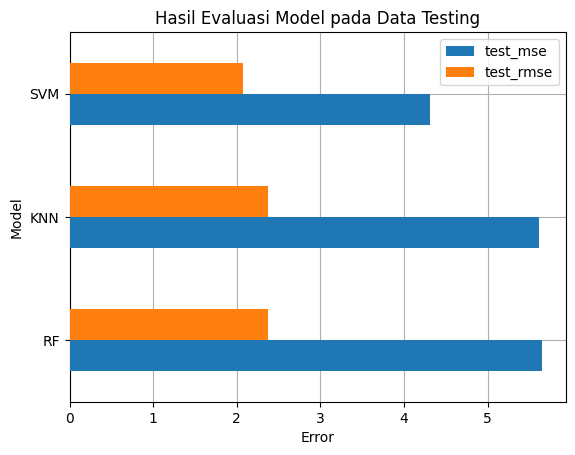

In [143]:
fig, ax = plt.subplots()
mse_rmse[['test_mse', 'test_rmse']].sort_values(by='test_mse', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)
plt.title('Hasil Evaluasi Model pada Data Testing')
plt.xlabel('Error')
plt.ylabel('Model')
plt.show()

Dari hasil di atas, terlihat bahwa model `Support Vector Machine (SVM)` memiliki nilai `MSE` dan `RMSE` terkecil pada data testing, sehingga model ini dipilih sebagai model terbaik.

## C. Membandingkan Data Aktual dengan Data Prediksi

In [144]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true': y_test[:10].values}
for name, model in model_dict.items():
    pred_dict['prediksi_' + name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_SVM
0,47.0,47.6,46.3,46.5
1,76.0,81.0,81.7,80.3
2,62.0,61.1,60.9,61.1
3,23.0,22.4,22.3,22.6
4,76.0,71.9,75.1,74.8
5,83.0,83.4,83.5,84.2
6,60.0,60.2,61.7,62.0
7,51.0,51.5,51.1,50.3
8,38.0,38.0,39.4,38.9
9,58.0,56.9,56.4,55.8


Dari hasil di atas, terlihat bahwa model `Support Vector Machine (SVM)` memiliki hasil prediksi yang mendekati data aktual, dibaningkan dengan model `Random Forest (RF)` dan `K-Nearest Neighbors (KNN)`.

# 9. Kesimpulan

Dari keseluruhan analisis dan pemodelan yang telah dilakukan pada notebook ini, dapat disimpulkan beberapa hal sebagai berikut:

1. **Data Cleaning**:
    - Tidak ada nilai yang hilang dalam dataset.
    - Terdapat 127 data duplikat yang telah dihapus.
    - Tidak ditemukan outlier pada dataset.

2. **Exploratory Data Analysis (EDA)**:
    - Analisis univariat menunjukkan distribusi dari masing-masing variabel.
    - Analisis multivariat menunjukkan hubungan antara variabel-variabel numerikal dan kategorikal.
    - Korelasi yang kuat ditemukan antara `Previous Scores` dan `Performance Index`.

3. **Data Preparation**:
    - Data kategorikal telah diencoding menjadi data numerik.
    - Data telah dibagi menjadi data training (80%) dan data testing (20%).

4. **Model Development**:
    - Tiga model machine learning telah dibentuk: K-Nearest Neighbors (KNN), Random Forest (RF), dan Support Vector Machine (SVM).
    - Model SVM menunjukkan performa terbaik dengan nilai MSE dan RMSE terkecil pada data testing.

5. **Evaluasi Model**:
    - Model SVM memiliki hasil prediksi yang mendekati data aktual dibandingkan dengan model RF dan KNN.
    - Model RF menunjukkan tanda-tanda overfitting pada data training.

Secara keseluruhan, model Support Vector Machine (SVM) dipilih sebagai model terbaik untuk memprediksi `Performance Index` siswa berdasarkan variabel-variabel yang ada dalam dataset ini.